<a href="https://colab.research.google.com/github/aminadli/Pizza-Sales/blob/main/Pizza_Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline
#plt.style.available[:5]
from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aminadli/Pizza-Sales/main/Data%20Model%20-%20Pizza%20Sales.csv")

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [6]:
df.shape

(48620, 12)

In [7]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [8]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [9]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df["Hour"].value_counts()

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: count, dtype: Int64

Data Visualization

<ipython-input-10-6afbf4e71693>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Hour",palette="plasma")


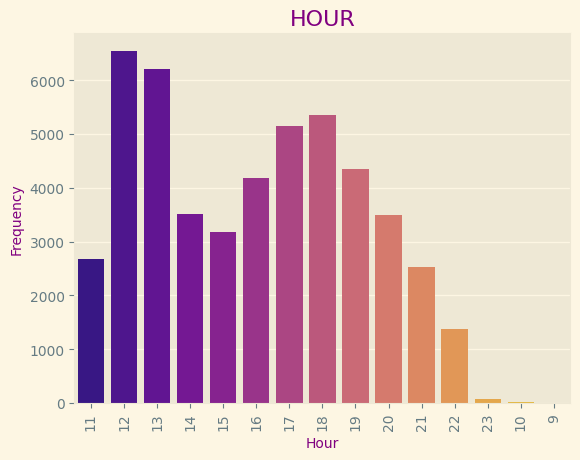

In [10]:
sns.countplot(data=df,x="Hour",palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="purple")
plt.ylabel("Frequency",fontsize=10,color="purple")
plt.title("HOUR",color="purple")
plt.show()

In [12]:
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_year'].value_counts()

order_year
2015    48620
Name: count, dtype: int64

In [15]:
df['order_dates'] = df['order_date'].dt.day_name()
df['order_dates'].value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

In [13]:
sns.countplot(data=df,x="order_dates",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("DATES",color="green")
plt.show()

ValueError: Could not interpret value `order_dates` for `x`. An entry with this name does not appear in `data`.

In [ ]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'
df['order_month'].value_counts()

In [ ]:
sns.countplot(data=df,x="order_month",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("MONTHS",color="black")
plt.show()

In [ ]:
df.pizza_id.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df,x="pizza_id",palette="tab20b_r",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()


In [ ]:
df.quantity.value_counts()

In [ ]:
sns.countplot(data=df,x="quantity",palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("quantity",fontsize=10,color="red")
plt.title("quantity",color="red")
plt.show()

In [ ]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

In [ ]:
df.pizza_category.value_counts()

In [ ]:
sns.countplot(data=df,x="pizza_category",palette="Oranges")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=10,color="orange")
plt.ylabel("Frequency",fontsize=10,color="orange")
plt.title("PİZZA CATEGORY",color="orange")
plt.show()

In [ ]:
df.Hour.value_counts()

In [ ]:
sns.countplot(data=df,x="Hour",palette="inferno")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("HOUR",color="black")
plt.show()

In [ ]:
df.pizza_ingredients.value_counts()

In [ ]:
df.pizza_name.value_counts()

In [ ]:
px.bar(data_frame=df, x='order_dates',color_discrete_sequence=['green'],
       labels={'order_dates':'count'},
       template='plotly_white',title='<b> Which day is the most ordered?')

In [ ]:
px.box(df,x='pizza_name',y='total_price',
       color='pizza_name',template='seaborn',
       labels={'pizza_name':'Name','total_price':'Price'},
       title='<b>Pizza Names and Prices')

In [ ]:
fig=px.pie(df.groupby('pizza_size',as_index=False)['total_price'].count().sort_values(by='total_price',
                                                                                              ascending=False),names='pizza_size',
           values='total_price',color='pizza_size',hole=0.7,labels={'pizza_size':'pizza_size','total_price':'price'},
           template='ggplot2',title='<b>  Pizza Sizes')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right'

In [ ]:
z=df['pizza_category'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Pizza Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="order_month", data=df, aspect=4.0, kind='count',hue='order_dates',palette="pastel")
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()

In [ ]:
fig = px.strip(df, x='order_dates', y='Hour', color='order_dates')
fig.show()

In [ ]:
joint_data=df.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(
    top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.show()

In [ ]:
pd.crosstab(df["Hour"], df["order_dates"]).plot(kind="bar", figsize=(20, 6),
                                                color=["blue","red","green","yellow","magenta","cyan","black","orange"],
                                                title="Day and Hour ")
plt.show()

In [ ]:
df1 = df.groupby(["pizza_size","pizza_category"],as_index=False)[['total_price']].median().rename(columns={'total_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "pizza_size","pizza_category"],
                 values   ='price', color='pizza_size',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

In [ ]:
fig = px.scatter(df, x = "pizza_size", y = "total_price", color = "pizza_size")
fig.show()